# Challenge 5
Veena Kumar

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


%matplotlib inline

In [2]:
df = pd.read_csv("../house_votes_84.csv",header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
0     435 non-null object
1     435 non-null object
2     435 non-null object
3     435 non-null object
4     435 non-null object
5     435 non-null object
6     435 non-null object
7     435 non-null object
8     435 non-null object
9     435 non-null object
10    435 non-null object
11    435 non-null object
12    435 non-null object
13    435 non-null object
14    435 non-null object
15    435 non-null object
16    435 non-null object
dtypes: object(17)
memory usage: 57.8+ KB


In [4]:
df.columns = ['Class','handicapped_infants','water_cost_sharing','budget_resol','phys_fee','el_salv','relig_school',
              'anti_sat_ban','nicaraguan_aid','mx_missile','immigration','syn_cutback','edu_spend',
              'superfund_sue','crime','duty_free','export_south_africa']

In [5]:
df.head()

,Class,handicapped_infants,water_cost_sharing,budget_resol,phys_fee,el_salv,relig_school,anti_sat_ban,nicaraguan_aid,mx_missile,immigration,syn_cutback,edu_spend,superfund_sue,crime,duty_free,export_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Exercise 5.1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

In [6]:
#replacing no's with 0 and yes's with 1

for col in df.columns:
    for i,v in enumerate(df[col]):
        if v == 'n':
            df[col][i] = 0
        if v == 'y':
            df[col][i] = 1
        if v == 'republican':
            df[col][i] = 0
        if v == 'democrat':
            df[col][i] = 1

In [7]:
df.head()

,Class,handicapped_infants,water_cost_sharing,budget_resol,phys_fee,el_salv,relig_school,anti_sat_ban,nicaraguan_aid,mx_missile,immigration,syn_cutback,edu_spend,superfund_sue,crime,duty_free,export_south_africa
0,0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,1,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,1,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [8]:
#first replacing all '?'s with nan. 
def replace_nan(df):
    for col in df.columns:
        df[col] = df[col].replace('?',np.nan)


In [9]:
replace_nan(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class                  435 non-null int64
handicapped_infants    423 non-null float64
water_cost_sharing     387 non-null float64
budget_resol           424 non-null float64
phys_fee               424 non-null float64
el_salv                420 non-null float64
relig_school           424 non-null float64
anti_sat_ban           421 non-null float64
nicaraguan_aid         420 non-null float64
mx_missile             413 non-null float64
immigration            428 non-null float64
syn_cutback            414 non-null float64
edu_spend              404 non-null float64
superfund_sue          410 non-null float64
crime                  418 non-null float64
duty_free              407 non-null float64
export_south_africa    331 non-null float64
dtypes: float64(16), int64(1)
memory usage: 57.8 KB


In [11]:
def fill_unknown(df):
    for col in df.columns:
        try:
            if df[col].mean() >= .5:
                df[col] = df[col].fillna(1)
            else:
                df[col] = df[col].fillna(0)
        except:
            continue

In [12]:
fill_unknown(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
Class                  435 non-null int64
handicapped_infants    435 non-null float64
water_cost_sharing     435 non-null float64
budget_resol           435 non-null float64
phys_fee               435 non-null float64
el_salv                435 non-null float64
relig_school           435 non-null float64
anti_sat_ban           435 non-null float64
nicaraguan_aid         435 non-null float64
mx_missile             435 non-null float64
immigration            435 non-null float64
syn_cutback            435 non-null float64
edu_spend              435 non-null float64
superfund_sue          435 non-null float64
crime                  435 non-null float64
duty_free              435 non-null float64
export_south_africa    435 non-null float64
dtypes: float64(16), int64(1)
memory usage: 57.8 KB


### Exercise 5.2

Split the data into a test and training set. Use this function:

**from sklearn.cross_validation import train_test_split**

In [14]:
from sklearn.cross_validation import train_test_split

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [147]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

### Exercise 5.3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

**from sklearn.neighbors import KNeighborsClassifier**

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test, y_pred)
print knn_score

0.916030534351


Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

**from sklearn.metrics import accuracy_score** 

Which k value gives the highest accuracy?

In [149]:
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fit = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    k_scores.append(scores)
print(k_scores)
print
print "The highest accuracy score is with k-value of " + str(k_scores.index(max(k_scores)) + 1)

[0.91603053435114501, 0.89312977099236646, 0.91603053435114501, 0.92366412213740456, 0.91603053435114501, 0.91603053435114501, 0.91603053435114501, 0.92366412213740456, 0.90839694656488545, 0.91603053435114501, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.91603053435114501, 0.92366412213740456, 0.91603053435114501, 0.90839694656488545, 0.90839694656488545, 0.90839694656488545]

The highest accuracy score is with k-value of 4


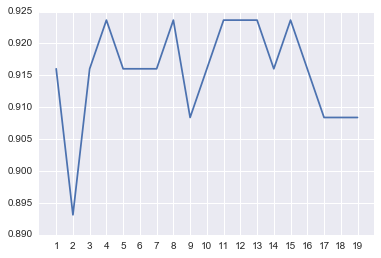

In [155]:
plt.plot(k_range,k_scores)
plt.xticks(k_range);

### Exercise 5.4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [64]:
from sklearn.linear_model import LogisticRegression

In [151]:
model_lr = LogisticRegression()
fit = model_lr.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print acc_score

0.93893129771


### Exercise 5.5

Make a bar graph of democrats and republicans. How many of each are there?

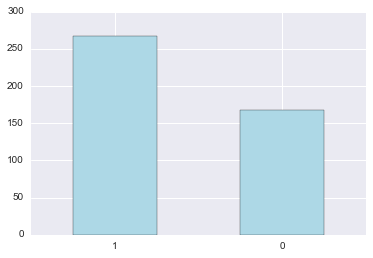

In [152]:
fig = df['Class'].value_counts().plot(kind='bar',rot=0,color='lightblue');

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [153]:
all_dems = [1 for d in range(len(X_test))]
all_reps = [0 for d in range(len(X_test))]
acc_dem = accuracy_score(y_test,all_dems)
acc_rep = accuracy_score(y_test,all_reps)

print "Dem Score:",acc_dem," Rep Score:", acc_rep

Dem Score: 0.587786259542  Rep Score: 0.412213740458


### Exercise 5.6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

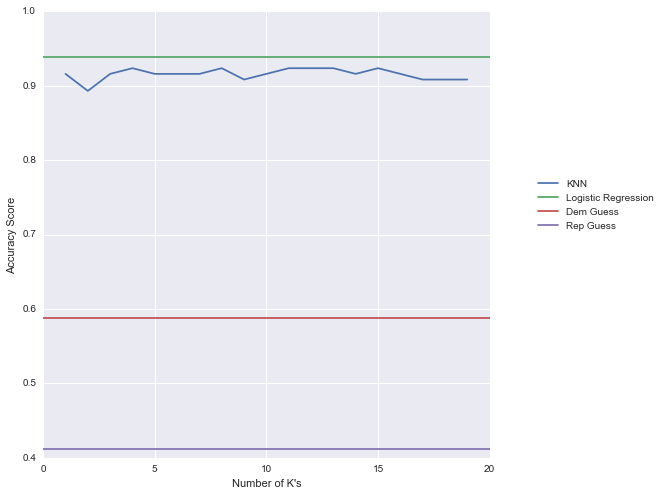

In [187]:
k_range = list(range(1, 20))
k = [0,20]
plt.figure(figsize=(8,8))
plt.plot(k_range,k_scores);
plt.plot(k,[acc_score,acc_score]);
plt.plot(k,[acc_dem,acc_dem]);
plt.plot(k,[acc_rep,acc_rep]);
plt.ylabel('Accuracy Score');
plt.xlabel('Number of K\'s')
plt.legend(['KNN','Logistic Regression','Dem Guess','Rep Guess'],loc=[1.1,.5]);

### Exercise 5.7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

**from sklearn.learning_curve import learning_curve**

*This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:*

*train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)*

*Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).*

Draw the learning curve for KNN with the best k value as well.

In [185]:
from sklearn.learning_curve import learning_curve

In [ ]:
m, train_err, test_err = learning_curve(KNeighborsClassifier(n_neighbors=4), X, y, cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Test Accuracy'],loc=[0.5,0.1]);
plt.title('KNN Learning Curves');

In [189]:
m, train_err, test_err = learning_curve(LogisticRegression(),X,y,cv=10)
train_cv_err = np.mean(train_err,axis=1)
test_cv_err = np.mean(test_err,axis=1) 

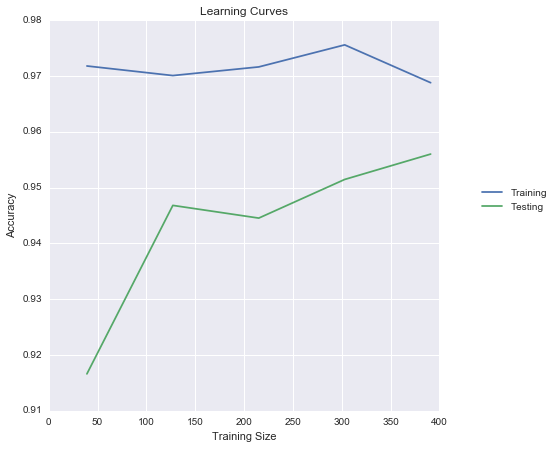

In [200]:
plt.figure(figsize=(7,7))
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.title('Learning Curves')
plt.ylabel('Accuracy')
plt.xlabel('Training Size')
plt.legend(['Training','Testing'],loc=(1.1,.5));

### Exercise 5.8

*This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier.* 

Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

** from sklearn.naive_bayes import GaussianNB** 

SVM (Support Vector Machine) Classifier

**from sklearn.svm import SVC** 

Decision Tree

**from sklearn.tree import DecisionTreeClassifier**

Random Forest

**from sklearn.ensemble import RandomForestClassifier**


In [211]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [212]:
model = GaussianNB()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_gauss = accuracy_score(y_test,y_pred)
print acc_gauss

0.93893129771


In [216]:
model = SVC()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred)
print acc_svc

0.954198473282


In [218]:
model = DecisionTreeClassifier()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_dtree = accuracy_score(y_test,y_pred)
print acc_dtree

0.931297709924


In [230]:
model = RandomForestClassifier()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_randforest = accuracy_score(y_test,y_pred)
print acc_randforest

0.961832061069


In [233]:
print "Gaussian Naive Bayes: ",acc_gauss
print "SVM Classifier: ",acc_svc
print "Decision Tree: ",acc_dtree
print "Random Forest: ",acc_randforest


Gaussian Naive Bayes:  0.93893129771
SVM Classifier:  0.954198473282
Decision Tree:  0.946564885496
Random Forest:  0.961832061069


### Exercise 5.9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

**from sklearn.cross_validation import cross_val_score** 

*Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.*

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [234]:
from sklearn.cross_validation import cross_val_score

In [236]:
gauss_cval = np.mean(cross_val_score(GaussianNB(),X,y,cv=10))
print "Gaussian Cross Validation Score: ", gauss_cval

Gaussian Cross Validation Score:  0.923648444579


In [237]:
svc_cval = np.mean(cross_val_score(SVC(),X,y,cv=10))
print "SVC Cross Validation Score: ", svc_cval

SVC Cross Validation Score:  0.95589952683


In [239]:
dtree_cval = np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10))
print "Decision Tree Cross Validation Score: ", dtree_cval

 Decision Tree Cross Validation Score:  0.946813651465


In [240]:
randfor_cval = np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10))
print "Random Forest Cross Validation Score: ", randfor_cval

Random Forest Cross Validation Score:  0.960553206483


### Exercise 5.10

*Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?*

Reload the data from scratch. Convert y-->1, n-->0.

In [271]:
df2 = pd.read_csv("../house_votes_84.csv",header=None)

In [272]:
for col in df2.columns:
    for i,v in enumerate(df2[col]):
        if v == 'n':
            df2[col][i] = 0
        if v == 'y':
            df2[col][i] = 1

In [273]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

In [274]:
for col in df2.columns:
    counts = df2[col].value_counts()
    df2[col] = df2[col].replace('?',counts.idxmax())

In [275]:
X = df2.iloc[:,2:]
y = df2.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [277]:
model = LogisticRegression()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print acc_score

0.671755725191


Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [278]:
cval = np.mean(cross_val_score(LogisticRegression(),X,y,cv=10))
print "Cross Validation Score: ", cval

Cross Validation Score:  0.687355280379


### Exercise 5.11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

In [282]:
movie_data = pd.read_csv('/Users/veenakumar/Desktop/Projects/Luther/Luther_Data_Manip.csv')
movie_data = movie_data.drop('Unnamed: 0', 1)

In [284]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 13 columns):
Distributor          1700 non-null object
Runtime              1700 non-null int64
Domestic_Total       1700 non-null float64
MPAA_Rating          1700 non-null object
Production_Budget    1700 non-null int64
Release_Date         1700 non-null object
Release_Yr           1700 non-null int64
Title                1699 non-null object
Foreign              1700 non-null float64
Genre                1700 non-null object
Total_Gross          1700 non-null float64
Domestic_Percent     1690 non-null float64
Foreign_Percent      1690 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 172.7+ KB


In [295]:
X = movie_data.loc[:,['Runtime','Domestic_Total','Runtime']]
y = movie_data.loc[:,'MPAA_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

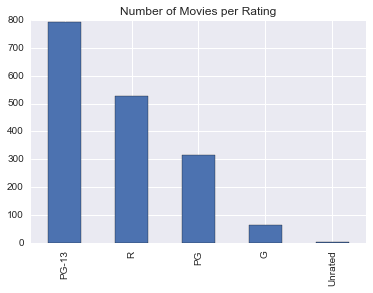

In [296]:
y.value_counts().plot('bar');
plt.title('Number of Movies per Rating');

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

In [303]:
knn_score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv=10))
print'KNN Cross Validation Score: ',knn_score

KNN Cross Validation Score:  0.400107963768


In [305]:
log_score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10))
print'Logistic Cross Validation Score: ',log_score

Logistic Cross Validation Score:  0.46533193766


Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

In [308]:
pred_label = ['PG-13' for d in range(len(X_test))]
acc_pred = accuracy_score(y_test,pred_label)
print "Always Predict PG-13 Accuracy Score: ", acc_pred

Always Predict PG-13 Accuracy Score:  0.496078431373


How much better do KNN and logistic regression do versus the baseline?

**KNN and logistic regression actually do worse than the baseline.**

What are the coefficients of logistic regression? Which features affect the outcome how?

In [310]:
fit = LogisticRegression().fit(X,y)
fit.coef_

array([[ -1.49208621e-13,  -3.39777074e-08,  -1.49208621e-13],
       [ -3.08835641e-14,  -8.93599747e-09,  -3.08835641e-14],
       [ -1.08082296e-15,   3.27583468e-10,  -1.08082296e-15],
       [ -6.24346960e-15,  -7.98529038e-09,  -6.24346960e-15],
       [ -1.09595339e-11,  -1.96639540e-07,  -1.09595339e-11]])

### Exercise 5.12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

In [313]:
#Reading in the data
df3 = pd.read_csv("haberman.data.csv",header=None)†

In [314]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
0    306 non-null int64
1    306 non-null int64
2    306 non-null int64
3    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [316]:
df3.columns = ['age','opyr','numpos','survstat']

In [317]:
df3.head()

,age,opyr,numpos,survstat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


1.What is the average and standard deviation of the age of all of the patients?

In [318]:
df3['age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

2.What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [320]:
df_age_5plus = df3.loc[df3['survstat'] == 1]

In [321]:
df_age_5plus['age'].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

3.What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

In [322]:
df_age_5minus = df3.loc[df3['survstat'] == 2]

In [323]:
df_age_5minus['age'].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

In [324]:
df_nodes = df3[['age','numpos','survstat']]

In [325]:
df_nodes.head()

,age,numpos,survstat
0,30,1,1
1,30,3,1
2,30,0,1
3,31,2,1
4,31,4,1


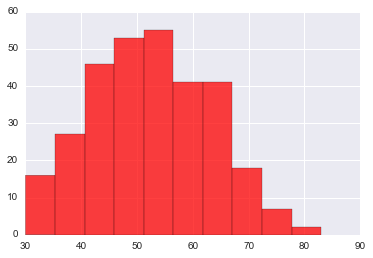

In [326]:
plt.hist([df_nodes.age], color=['r'], alpha=0.75);

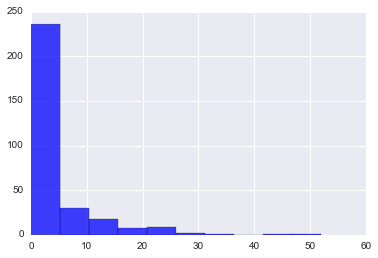

In [327]:
plt.hist([df_nodes.numpos], color=['b'], alpha=0.75);

What is the earliest year of surgery in this dataset?  
What is the most recent year of surgery?

In [328]:
df3.opyr.describe()
#Min = 1958, max = 1969

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: opyr, dtype: float64

Use logistic regression to predict survival after 5 years. How well does your model do?

In [330]:
X = df3.iloc[:,:3]
y = df3.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [331]:
model = LogisticRegression()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
acc_score = accuracy_score(y_test,y_pred)
print acc_score

0.815217391304


What are the coefficients of logistic regression? Which features affect the outcome how?

In [333]:
fit = LogisticRegression().fit(X,y)
fit.coef_

#None of the features seem to have a significant effect

array([[ 0.01854689, -0.0345458 ,  0.08812314]])

Draw the learning curve for logistic regression in this case.

In [335]:
m, train_err, test_err = learning_curve(LogisticRegression(),X,y,cv=5)
train_cv_err = np.mean(train_err,axis=1)
test_cv_err = np.mean(test_err,axis=1) 

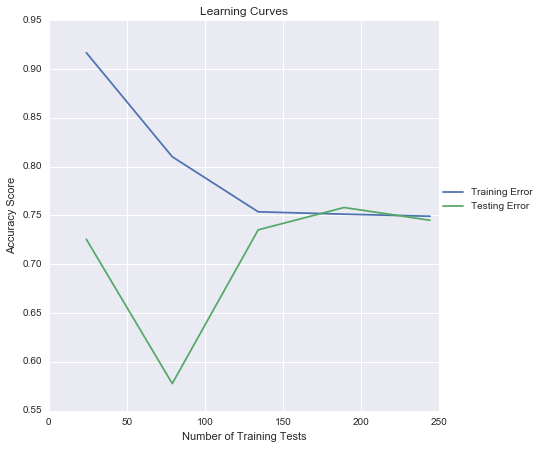

In [347]:
plt.figure(figsize=(7,7));
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err);
plt.title('Learning Curves')
plt.xlabel('Number of Training Tests')
plt.ylabel('Accuracy Score');
plt.legend(['Training Error','Testing Error'],loc=[1,.5]);